# Comparison between 
# <font color='blue'> <i> Zhao et al. (2013) </i> </font> $P(k)$ and <font color='orange'> <i> $P^\mathtt{true}(k)$ </i> </font>

In [63]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors
prettyplot()
pretty_colors = prettycolors()
import warnings
warnings.filterwarnings('ignore')

## Read in Nseries mock $\overline{P(k)}$ 

In [64]:
pk_file = lambda l, corr: ''.join(['../dat/',
                                   'AVG_P', str(l), 
                                   'K_POWER_Q_CutskyN.84mocks.rebin6x.fidcosmo', 
                                   corr, '.dat.grid960.P020000.box3600'
                                  ])
pk_true = lambda l: np.loadtxt(pk_file(l,''), unpack=True, usecols=[0,1])
pk_NN = lambda l: np.loadtxt(pk_file(l,'.fibcoll'), unpack=True, usecols=[0,1])
pk_now = lambda l: np.loadtxt(pk_file(l,'.noweight'), unpack=True, usecols=[0,1])

In [65]:
fc_paper_data = pickle.load(open('../dat/mock_catalog_NN_true_Plk_resid.rebin6x.figdata.p', 'rb'))

nseries_data0 = fc_paper_data[0]
k_cv0 = nseries_data0['k']
pk_cv0 = nseries_data0['cv']

nseries_data2 = fc_paper_data[3]
k_cv2 = nseries_data2['k']
pk_cv2 = nseries_data2['cv']

## In <font color='blue'><i> Zhao et al. (2013) </i></font>
they use the <i> Ross et al. (2012) </i> corrected $P(k)$:



$$ P^\mathrm{Zhao}(k) = P^\mathrm{NN}(k) - S\; \bigg[ P^\mathrm{NoWeight}(k) - P^\mathrm{NN}(k) \bigg]$$



where the prior for $S$ is a Gaussian with $\mu = 0$ and $\sigma = 0.1$: 
$$\mathcal{N}(0, 0.1)$$

## Lets see how this compares to the <font color='orange'> $P^\mathtt{true}(k)$ </font> for the _monopole_

In [66]:
def pk_zhao(l, S): 
    '''Calculate Zhao et al. (2013) P_l(k) for given S value 
    '''
    P_now = pk_now(l)[1] 
    P_NN = pk_NN(l)[1]
    pkZ = P_NN - S * (P_now - P_NN)
    return [pk_NN(l)[0], pkZ]

In [79]:
def pk_fig(l): 
    fig = plt.figure(1, figsize=[7,8])
    sub = fig.add_subplot(111)
    sub.fill_between(
        pk_zhao(l, 0.)[0], 
        pk_zhao(l, -0.2)[1], 
        pk_zhao(l, 0.2)[1], 
        color=pretty_colors[1], alpha=0.5)
    sub.fill_between(
        pk_zhao(l, 0.)[0], 
        pk_zhao(l, -0.1)[1], 
        pk_zhao(l, 0.1)[1], 
        color=pretty_colors[1], label='Zhao et al. (2013)')
    sub.scatter(pk_true(l)[0], pk_true(l)[1], c='k', s=4, label='True')
    # axes
    sub.legend(loc='lower left', scatterpoints=1)
    sub.set_xlim([0.001, 1.0])
    sub.set_xlabel(r"$\mathtt{k}$", fontsize=25)
    sub.set_xscale('log')
    sub.set_ylabel(r"$\mathtt{P_"+str(l)+"(k)}$", fontsize=25)
    sub.set_yscale('log')

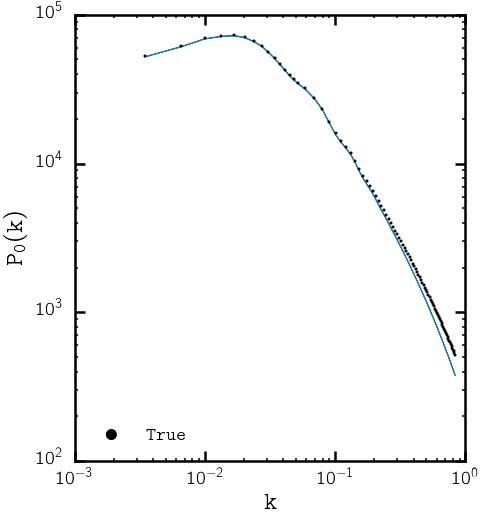

In [68]:
pk_fig(0)

* visibly significant deviations at $k > 0.1$

## How about the $P(k)$ residuals? 

In [104]:
def pk_resid_fig(l): 
    fig = plt.figure(1, figsize=[10,8])
    sub = fig.add_subplot(111)
    
    if l == 0: 
        k_cv = k_cv0
        pk_cv = -1.0 * pk_cv0
    elif l == 2: 
        k_cv = k_cv2
        pk_cv = pk_cv2
    cvsub = sub.fill_between(k_cv, pk_cv, np.zeros(len(pk_cv)), 
                     color='none', linewidth=1, edgecolor='k',  hatch='X')
    sub.fill_between(
        pk_zhao(l, 0.)[0], 
        pk_zhao(l, -1.)[1] - pk_true(l)[1], 
        pk_zhao(l, 1.)[1] - pk_true(l)[1], 
        color=pretty_colors[1], alpha=0.2)
    sub.fill_between(
        pk_zhao(l, 0.)[0], 
        pk_zhao(l, -0.2)[1] - pk_true(l)[1], 
        pk_zhao(l, 0.2)[1] - pk_true(l)[1], 
        color=pretty_colors[1], alpha=0.5)
    sub.fill_between(
        pk_zhao(l, 0.)[0], 
        pk_zhao(l, -0.1)[1] - pk_true(l)[1], 
        pk_zhao(l, 0.1)[1] - pk_true(l)[1], 
        color=pretty_colors[1])
    nn_scat = sub.scatter(pk_NN(l)[0], pk_NN(l)[1] - pk_true(l)[1], 
        color=pretty_colors[3], label='Nearest Neighbor')

    # axes
    sub.set_xlim([0.001, 10.0])
    sub.set_xlabel(r"$\mathtt{k}$", fontsize=25)
    sub.set_xscale('log')
    if l == 0: 
        sub.set_ylim([-1000., 0.0])
        leg_loc = 'lower right'
    elif l == 2: 
        sub.set_ylim([-100., 1000.])
        leg_loc = 'upper right'
        
    onesig = mpatches.Patch(color=pretty_colors[1])
    twosig = mpatches.Patch(color=pretty_colors[1], alpha=0.5)
    priorlim = mpatches.Patch(color=pretty_colors[1], alpha=0.2)

    sub.legend([onesig, twosig, nn_scat], 
               ['Zhao+(2013) $1 \sigma$', 'Zhao+(2013) $2 \sigma$', 'Zhao+(2013), $\mathtt{S=1}$','Nearest Neighbor'],
               loc=leg_loc, scatterpoints=1, markerscale=3)
            
    sub.set_ylabel(r"$\mathtt{P_"+str(l)+"(k)-P_"+str(l)+"^{true}(k)}$", fontsize=25)

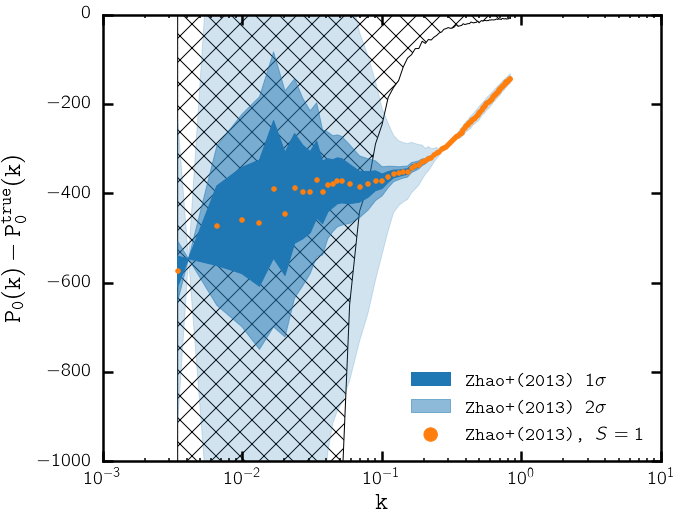

In [102]:
pk_resid_fig(0)

## Noramlized $P(k)$ Residual

In [98]:
def pk_norm_resid_fig(l): 
    fig = plt.figure(1, figsize=[10,8])
    sub = fig.add_subplot(111)
    
    if l == 0: 
        k_cv = k_cv0
        pk_cv = pk_cv0
    elif l == 2: 
        k_cv = k_cv2
        pk_cv = pk_cv2
    sub.fill_between(k_cv, pk_cv/pk_true(l)[1], np.zeros(len(pk_cv)), 
                     color='none', linewidth=1, edgecolor='k',  hatch='X')

    sub.fill_between(
        pk_zhao(l,0.)[0], 
        np.abs(1.-(pk_zhao(l, -0.2)[1]/pk_true(l)[1])), 
        np.abs(1.-(pk_zhao(l, 0.2)[1]/pk_true(l)[1])), 
        color=pretty_colors[1], alpha=0.5)
    sub.fill_between(
        pk_zhao(l,0.)[0], 
        np.abs(1.-(pk_zhao(l, -0.1)[1]/pk_true(l)[1])), 
        np.abs(1.-(pk_zhao(l, 0.1)[1]/pk_true(l)[1])), 
        color=pretty_colors[1], label='Zhao et al. (2013)')
    NNsub, = sub.plot(pk_NN(l)[0], np.abs(1.-(pk_NN(l)[1]/pk_true(l)[1])), 
        color=pretty_colors[3], label='Nearest Neighbor')

    # axes
    sub.set_xlim([0.001, 10.0])
    sub.set_xlabel(r"$\mathtt{k}$", fontsize=25)
    sub.set_xscale('log')
    sub.set_ylabel(r"$\mathtt{P_"+str(l)+"(k)-P_"+str(l)+"^{true}(k)}$", fontsize=25)
    if l == 0: 
        sub.set_ylim([0.0, 0.05])
    elif l == 2: 
        sub.set_ylim([0., 0.5])

    onesig = mpatches.Patch(color=pretty_colors[1])
    twosig = mpatches.Patch(color=pretty_colors[1], alpha=0.5)

    sub.legend([onesig, twosig, NNsub], 
               ['Zhao+(2013) $1 \sigma$', 'Zhao+(2013) $2 \sigma$', 'Nearest Neighbor'],
               loc='upper right', scatterpoints=1, markerscale=3)

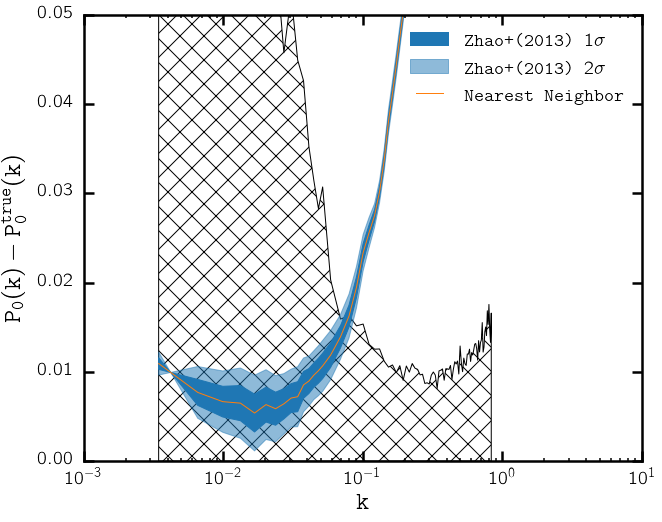

In [72]:
pk_norm_resid_fig(0)

* Hatched region represents the sample variance
    * Residuals exceed sample variance at $k \sim 0.1$, even for $2\sigma$ values of $S$. 
    * For higher values of $k$, *Zhao et al. (2013)* $P(k)$ is equivalent t $P^\mathtt{NN}(k)$. 

# Now for the _Quadrupole_

## $P(k)$ Comparison

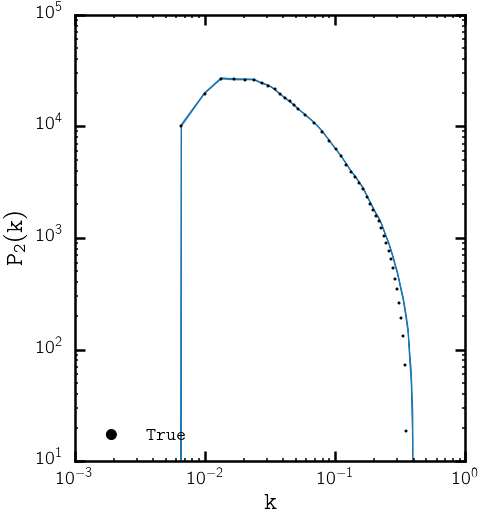

In [73]:
pk_fig(2)

# $P(k)$ Residual

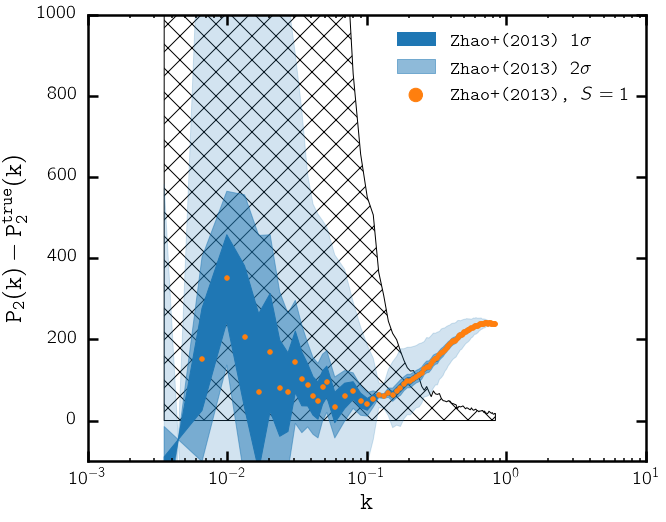

In [103]:
pk_resid_fig(2)

# $P(k)$ Noramlized Residual

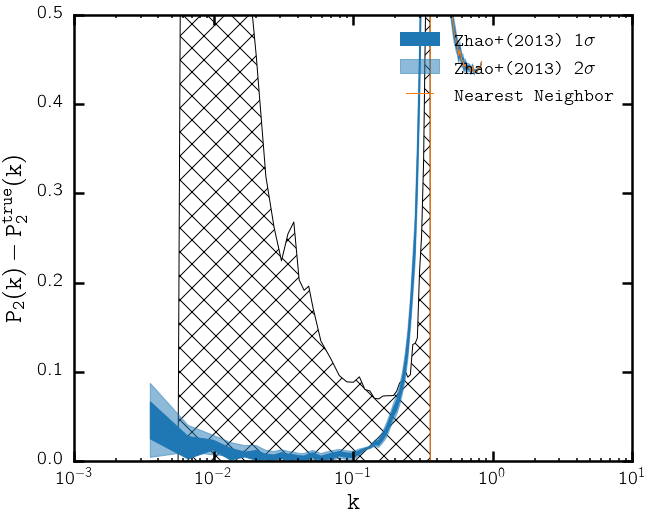

In [97]:
pk_norm_resid_fig(2)